In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

Input:
* For a given gene, sets of observations from different populations
* Delta value

Output:
* P value from two-sample t test for difference in means
* P value for equivalence testing procedure

In [4]:
def perform_t_tests(group1_vals, group2_vals, delta):
    mean1 = np.mean(group1_vals)
    mean2 = np.mean(group2_vals)
    
    # perform standard t-test (testing for difference)
    # consider switching to Welch's t-test (current assumes equal variances)
    diff_pval = stats.ttest_ind(a=group1_vals, b = group2_vals).pvalue

    # get t statistics for equivalence test
    # (X1 - X2 - delta)/sqrt(s1^2/n1 + s2^2/n2)
    t1 = (np.mean(group1_vals) - np.mean(group2_vals) - delta)/np.sqrt(np.var(group1_vals)/len(group1_vals)+np.var(group2_vals)/len(group2_vals))

    # (X1 - X2 + delta)/sqrt(s1^2/n1 + s2^2/n2)
    t2 = (np.mean(group1_vals) - np.mean(group2_vals) + delta)/np.sqrt(np.var(group1_vals)/len(group1_vals)+np.var(group2_vals)/len(group2_vals))

    # find degrees of freedom (n1 + n2 - 1)
    df = len(group1_vals) + len(group2_vals)

    # find p value for t1 (less than)
    p1 = stats.t.cdf(t1, df)

    # find p value for t2 (greater than)
    # sf is survival function: 1 - cdf
    p2 = stats.t.sf(t2, df)

    equiv_pval = np.max([p1, p2])
    print("diff pvalue: {}\nequiv pvalue: {}".format(diff_pval, equiv_pval))
    return diff_pval, equiv_pval

def plot_groups(group1_vals, group2_vals):
    mean1 = np.mean(group1_vals)
    mean2 = np.mean(group2_vals)
    plt.hist(group1_vals,alpha=0.4, color=u'#1f77b4')
    plt.axvline(x=mean1, color=u'#1f77b4',linestyle="--")
    plt.hist(group2_vals,alpha = 0.4, color = u'#ff7f0e')
    plt.axvline(x=mean2, color=u'#ff7f0e',linestyle="--")
    # plt.axvline(x=np.mean(group2_vals), color="black")
    plt.title("difference in means: {:.3f}".format(mean1 - mean2))
    plt.show()

diff pvalue: 0.002221190590523137
equiv pvalue: 0.22409645687360635


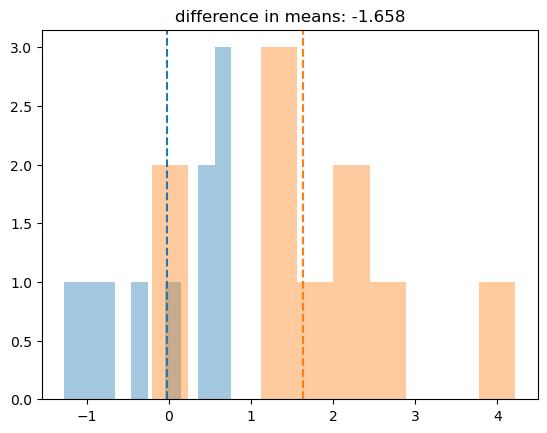

In [11]:
delta = 2
num_observations = 10

group1_mean = 0
group1_std = 1
group1_vals = np.random.normal(group1_mean, group1_std, num_observations)

group2_mean = 1
group2_std = 1
group2_vals = np.random.normal(group2_mean, group2_std, num_observations)


perform_t_tests(group1_vals, group2_vals, delta)
plot_groups(group1_vals, group2_vals)

diff pvalue: 0.2813848317905299
equiv pvalue: 0.25467778375530703


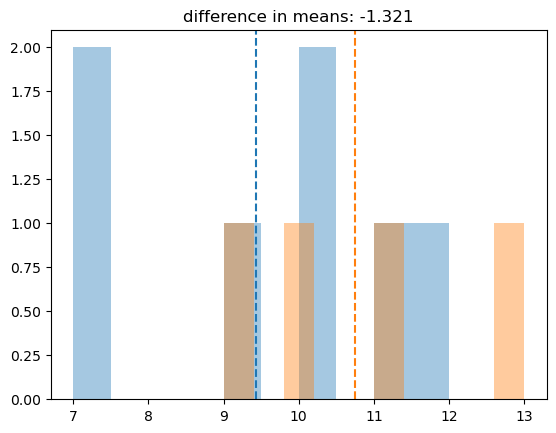

diff pvalue: 0.0001163869932631116
equiv pvalue: 0.9999531175664844


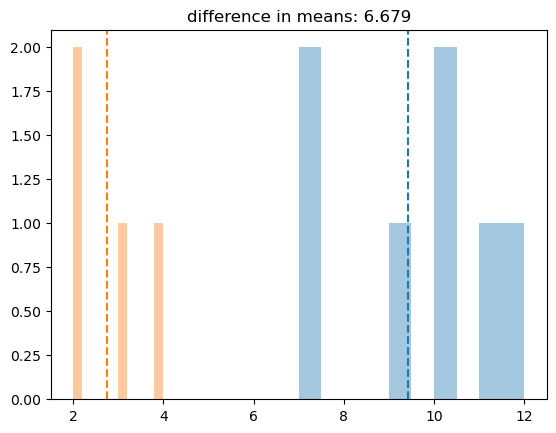

diff pvalue: 0.8946560766366678
equiv pvalue: 0.03917496449159887


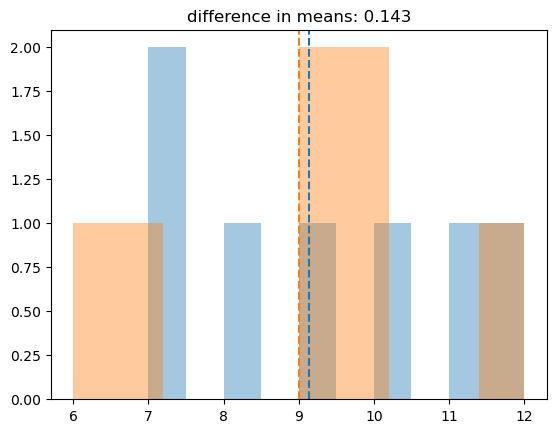

In [5]:
delta = 2

# example 1
group1_vals = [7, 9, 7, 10, 11, 12, 10]
group2_vals = [10,11,13,9]

perform_t_tests(group1_vals, group2_vals, delta)
plot_groups(group1_vals, group2_vals)

# example 2
group1_vals = [7, 9, 7, 10, 11, 12, 10]
group2_vals = [2,3,4,2]

perform_t_tests(group1_vals, group2_vals, delta)
plot_groups(group1_vals, group2_vals)

# example 3
group1_vals = [7, 9, 7, 10, 11, 12, 8]
group2_vals = [6, 9, 7, 10, 10, 12, 9]

perform_t_tests(group1_vals, group2_vals, delta)
plot_groups(group1_vals, group2_vals)


In [2]:
group1_vals = [10,11,13,9]
group2_vals = [7, 9, 3, 10, 11, 12, 10]
delta = 2



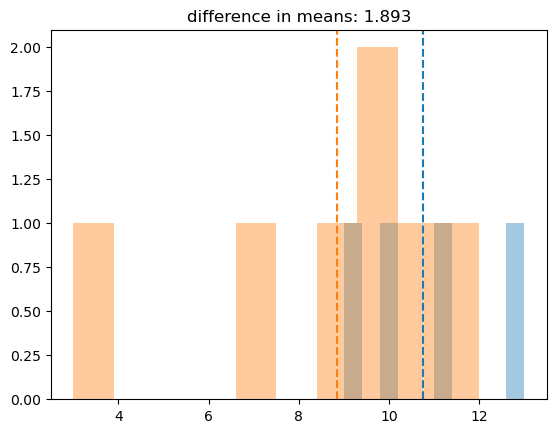

In [6]:
plt.hist(group1_vals,alpha=0.4, color=u'#1f77b4')
plt.axvline(x=mean1, color=u'#1f77b4',linestyle="--")
plt.hist(group2_vals, alpha = 0.4, color = u'#ff7f0e')
plt.axvline(x=mean2, color=u'#ff7f0e',linestyle="--")
# plt.axvline(x=np.mean(group2_vals), color="black")
plt.title("difference in means: {:.3f}".format(mean1 - mean2))
plt.show()